In [ ]:
from fastai.vision.all import *
import ipywidgets.widgets as widgets

In [2]:
path = '/home/avgdev/datasets/pokemon-classification/data'

In [4]:
fns = get_image_files(path)
fns[0]

Path('/home/avgdev/datasets/pokemon-classification/data/train/Hypno/8312c79893eb48008428f6536a80c3df_jpg.rf.cd36a0be9c005e8b991b47c3ffdca41a.jpg')

In [6]:
label = parent_label(fns[0])
label

'Hypno'

In [149]:
pokemon_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2)
)
pokemon_block

In [150]:
dls = pokemon_block.dataloaders(path, bs=16)
dls

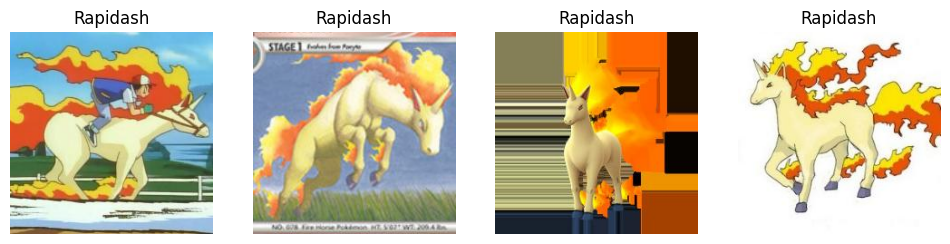

In [151]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5) # learn_rate: 1e-2

epoch,train_loss,valid_loss,error_rate,time
0,2.852664,2.155549,0.566355,00:14


epoch,train_loss,valid_loss,error_rate,time
0,1.207716,1.060652,0.293458,00:21
1,0.791554,0.656873,0.179439,00:21
2,0.505793,0.470412,0.147664,00:21
3,0.285946,0.420271,0.112150,00:21
4,0.169285,0.394455,0.108411,00:21


In [162]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [168]:
img = PILImage.create(btn_upload.data[-1])
#img.resize((224, 224))
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [170]:
import numpy as np

pred,pred_idx,probs = learn.predict(img)
pred, pred_idx, probs, probs[np.argmax(probs)]

#print(f"This Pokemon is: {pred}")

('Rhyhorn',
 tensor(116),
 tensor([2.7951e-07, 2.8256e-03, 2.9291e-06, 2.3993e-06, 1.5354e-06, 9.1752e-06,
         1.2386e-07, 3.2215e-06, 3.3446e-08, 2.9287e-05, 4.6316e-05, 8.8656e-06,
         1.2720e-06, 5.1489e-07, 3.9065e-06, 4.4385e-07, 2.9454e-06, 8.1496e-06,
         3.1581e-05, 1.4216e-04, 1.2004e-03, 6.9702e-05, 1.8306e-06, 6.1773e-05,
         1.2769e-06, 1.8482e-06, 9.5204e-07, 8.3993e-08, 1.0114e-05, 2.7176e-06,
         1.3114e-05, 3.6881e-07, 2.7830e-07, 2.4348e-07, 6.3647e-07, 2.2619e-05,
         1.6999e-07, 7.2919e-07, 2.8235e-07, 8.5623e-06, 2.0992e-06, 7.8613e-06,
         2.2853e-03, 6.4621e-07, 8.8728e-07, 1.3475e-04, 1.4565e-04, 5.8303e-05,
         5.7773e-05, 6.1455e-04, 2.8410e-06, 2.5770e-06, 2.3975e-04, 2.3277e-05,
         8.1914e-06, 4.3359e-06, 1.4166e-06, 3.0878e-06, 1.6408e-04, 4.3077e-07,
         9.7191e-08, 1.6985e-07, 4.5756e-06, 5.8811e-05, 8.0676e-07, 3.3620e-05,
         5.5006e-06, 8.2115e-06, 1.3581e-05, 1.5458e-04, 7.0250e-06, 2.0589e-05,
  

In [161]:
btn_upload.close()

In [171]:
learn.export()

In [179]:
learn
del learn

In [180]:
learn_inf = load_learner('export.pkl')

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [181]:
learn_inf.predict(img)

('Rhyhorn',
 tensor(116),
 tensor([2.7910e-07, 2.8177e-03, 2.9173e-06, 2.3976e-06, 1.5339e-06, 9.1519e-06,
         1.2382e-07, 3.2192e-06, 3.3411e-08, 2.9262e-05, 4.6319e-05, 8.8569e-06,
         1.2720e-06, 5.1434e-07, 3.9041e-06, 4.4316e-07, 2.9402e-06, 8.1293e-06,
         3.1541e-05, 1.4193e-04, 1.1965e-03, 6.9609e-05, 1.8259e-06, 6.1680e-05,
         1.2752e-06, 1.8464e-06, 9.5043e-07, 8.4001e-08, 1.0104e-05, 2.7161e-06,
         1.3097e-05, 3.6899e-07, 2.7760e-07, 2.4355e-07, 6.3492e-07, 2.2606e-05,
         1.6994e-07, 7.2675e-07, 2.8205e-07, 8.5428e-06, 2.0947e-06, 7.8554e-06,
         2.2810e-03, 6.4576e-07, 8.8596e-07, 1.3410e-04, 1.4519e-04, 5.8320e-05,
         5.7693e-05, 6.1251e-04, 2.8346e-06, 2.5766e-06, 2.3939e-04, 2.3216e-05,
         8.1722e-06, 4.3206e-06, 1.4173e-06, 3.0868e-06, 1.6402e-04, 4.2974e-07,
         9.6888e-08, 1.6951e-07, 4.5617e-06, 5.8786e-05, 8.0655e-07, 3.3631e-05,
         5.4941e-06, 8.1938e-06, 1.3582e-05, 1.5426e-04, 7.0096e-06, 2.0574e-05,
  